In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
heartData = pd.read_csv("heart.csv")
heartData

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

In [3]:
print("Data type : ", type(heartData))
print("Data dims : ", heartData.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (918, 12)


In [4]:
heartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
heartData.describe().round(2)

Age  RestingBP  Cholesterol  FastingBS   MaxHR  Oldpeak  \
count  918.00     918.00       918.00     918.00  918.00   918.00   
mean    53.51     132.40       198.80       0.23  136.81     0.89   
std      9.43      18.51       109.38       0.42   25.46     1.07   
min     28.00       0.00         0.00       0.00   60.00    -2.60   
25%     47.00     120.00       173.25       0.00  120.00     0.00   
50%     54.00     130.00       223.00       0.00  138.00     0.60   
75%     60.00     140.00       267.00       0.00  156.00     1.50   
max     77.00     200.00       603.00       1.00  202.00     6.20   

       HeartDisease  
count        918.00  
mean           0.55  
std            0.50  
min            0.00  
25%            0.00  
50%            1.00  
75%            1.00  
max            1.00

## Checking for Null and Duplicate Records


In [6]:
heartData.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
heartData.duplicated().sum()

0

## Age Column

In [8]:
mean_of_age = heartData["Age"].mean()
median_of_age = heartData["Age"].median()

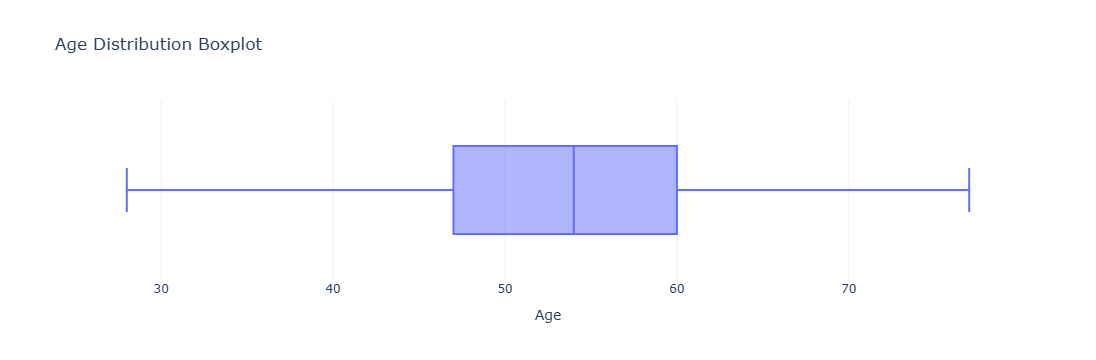

In [9]:
fig = px.box(
    x = heartData["Age"],
    title = "Age Distribution Boxplot",
    labels = {"x" :"Age"},
    template="plotly_white",
)

fig.show()

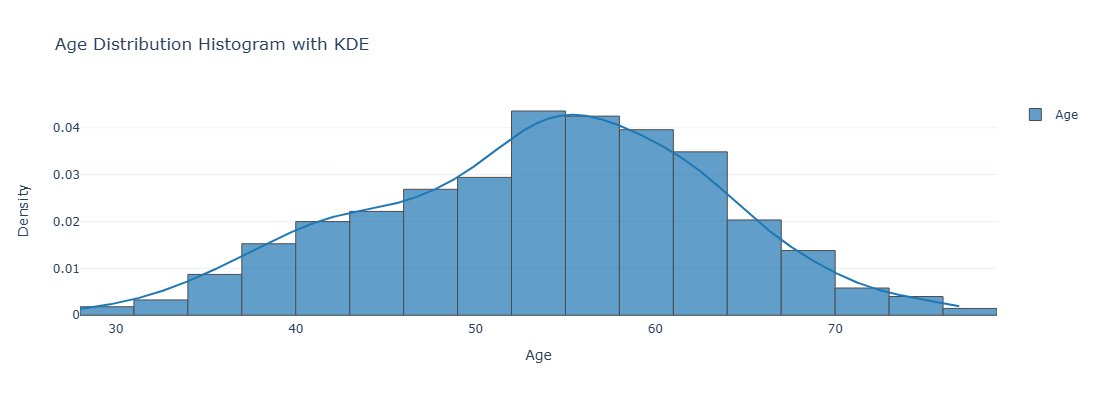

In [10]:
import plotly.figure_factory as ff

# Create a histogram with a KDE overlay
fig = ff.create_distplot(
    [heartData['Age']],            # List of distributions (single column in this case)
    group_labels=['Age'],          # Label for the distribution
    bin_size = 3,                  # Set bin size, adjust as needed
    show_hist = True,              # Show the histogram
    show_rug = False               # Optionally show the rug plot
)

# Customize the layout and add outline for each bar
fig.update_traces(
    marker=dict(
        line=dict(color = 'black', width = 1)  # Set outline color and width
    )
)

fig.update_layout(
    title="Age Distribution Histogram with KDE",
    xaxis_title="Age",
    yaxis_title="Density",
    width=800,
    height=400,
    template="plotly_white",
)

fig.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Age', ylabel='Count'>

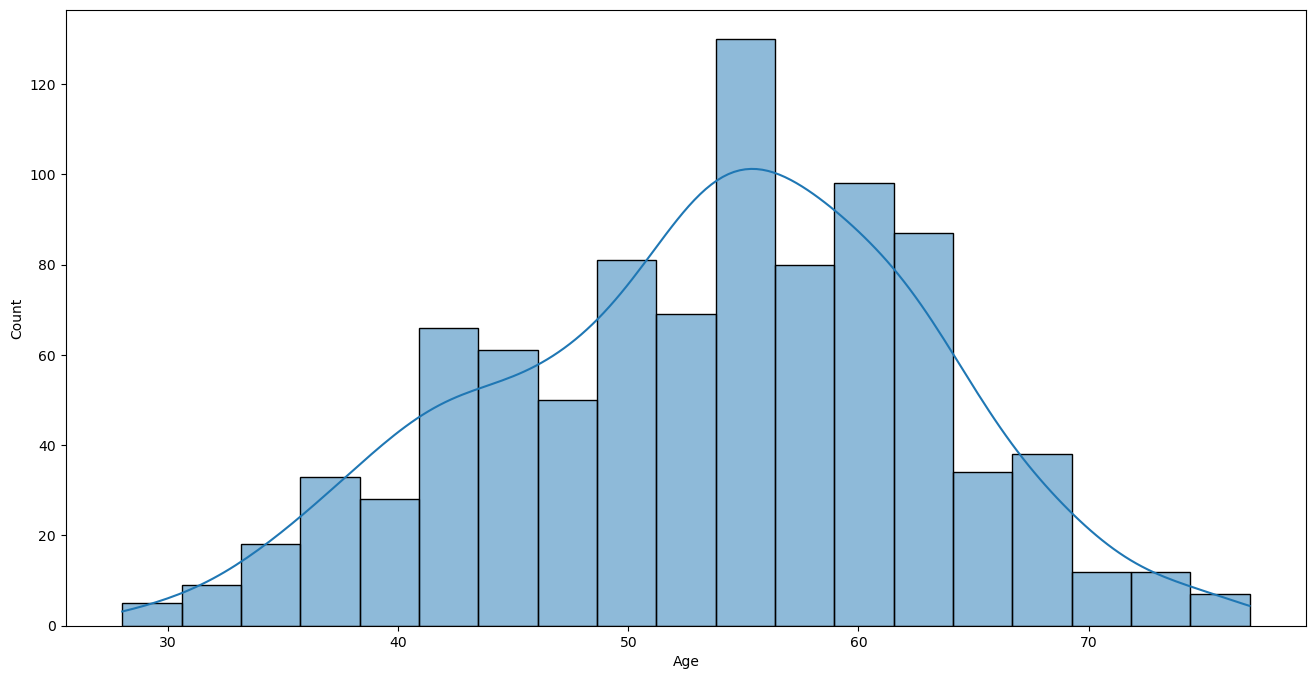

In [11]:
f = plt.figure(figsize=(16, 8))
sb.histplot(data = heartData['Age'], kde = True)

In [12]:
age = heartData["Age"]
age.describe()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

## Numerical Data

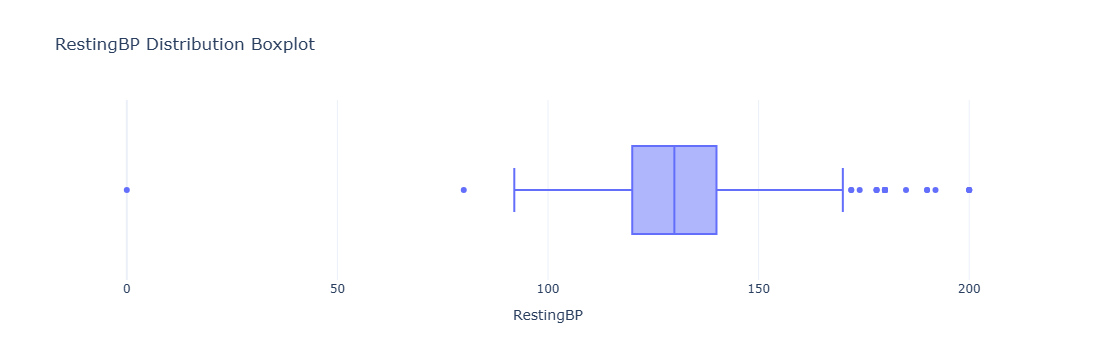

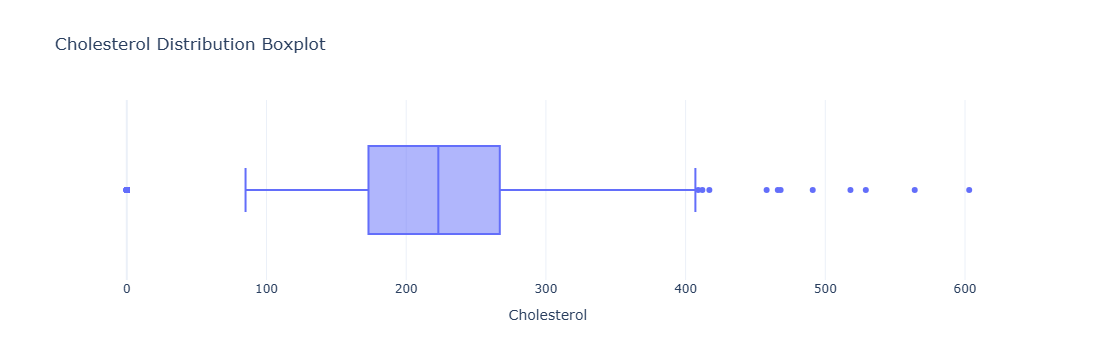

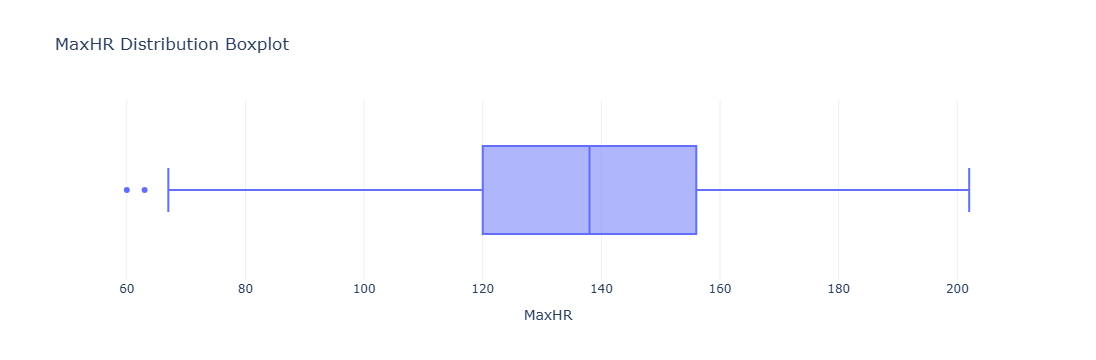

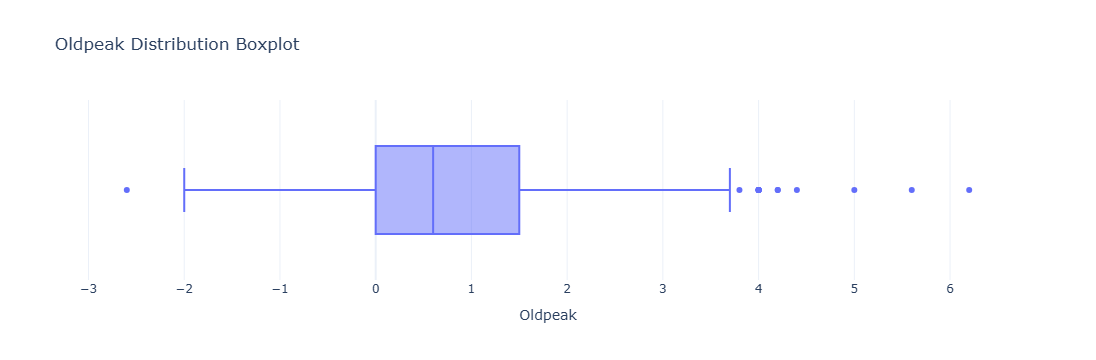

In [13]:
# Define the columns for which to create horizontal box plots
columns = ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Create a horizontal box plot for each column
for column in columns:
    fig = px.box(heartData, x=column, title=f'{column} Distribution Boxplot', template='plotly_white')
    fig.update_layout(xaxis_title=column)  # Update x-axis title
    fig.show()

From the box plot, we can observe the presence of outliers.

Upon further investigation, we found that high blood pressure is a risk factor for heart disease. Therefore, let’s examine the incidence of heart disease in individuals with blood pressure levels exceeding 170 mmHg (systolic).

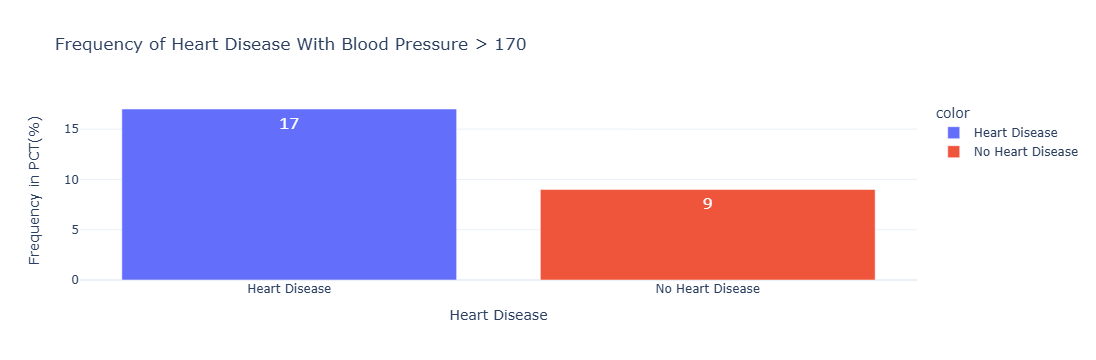

In [14]:
high_blood = heartData[heartData["RestingBP"] > 170]["HeartDisease"].value_counts()

fig = px.bar(
    data_frame = high_blood,
    x = ["No Heart Disease" if i == 0 else "Heart Disease" for i in high_blood.index],
    y = high_blood,
    color = ["No Heart Disease" if i == 0 else "Heart Disease" for i in high_blood.index],
    title = "Frequency of Heart Disease With Blood Pressure > 170",
    labels= {"x" :"Heart Disease", "y": "Frequency in PCT(%)"},
    template="plotly_white",
    text = high_blood
)

fig.update_traces(
    textfont = {
        "size" : 18,
        "family" :"consolas",
        "color": "#fff"
    },
    hovertemplate = "%{x}<br>Frequency: %{y:0.0f}",
)

iplot(fig)

Individuals with blood pressure levels greater than 170 mmHg tend to have a higher risk of heart disease.

After some research, we discovered that elevated cholesterol levels in the blood can raise the risk of heart disease. Let’s now examine the outliers with cholesterol levels above 407 mg/dl.

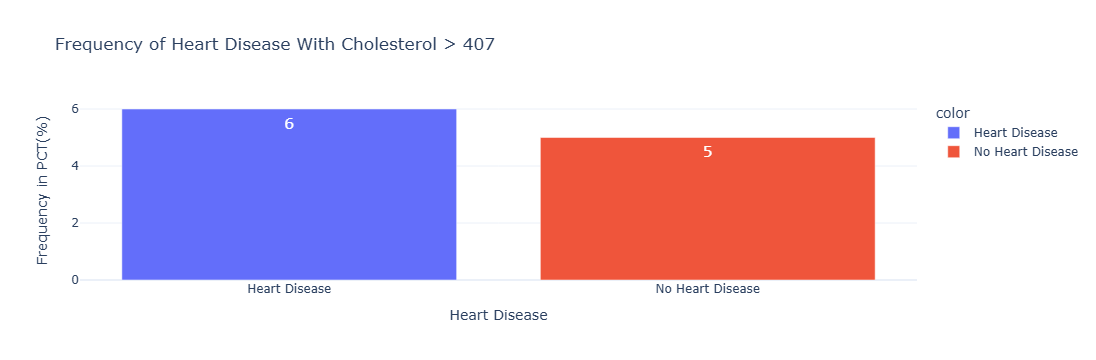

In [15]:
chol = heartData[heartData["Cholesterol"] > 407]["HeartDisease"].value_counts()


fig = px.bar(
    data_frame = chol,
    x = ["No Heart Disease" if i == 0 else "Heart Disease" for i in chol.index],
    y = chol,
    color = ["No Heart Disease" if i == 0 else "Heart Disease" for i in chol.index],
    title = "Frequency of Heart Disease With Cholesterol > 407",
    labels= {"x" :"Heart Disease", "y": "Frequency in PCT(%)"},
    template="plotly_white",
    text = chol
)

fig.update_traces(
    textfont = {
        "size" : 18,
        "family" :"consolas",
        "color": "#fff"
    },
    hovertemplate = "%{x}<br>Frequency: %{y:0.0f}",
)

iplot(fig)


It can be observed that individuals with cholesterol levels exceeding 407 mg/dl are more likely to have heart disease.

After some research, we found that a high Oldpeak value can indicate a greater risk of heart disease. Let’s examine the outliers with Oldpeak values above 3.7.



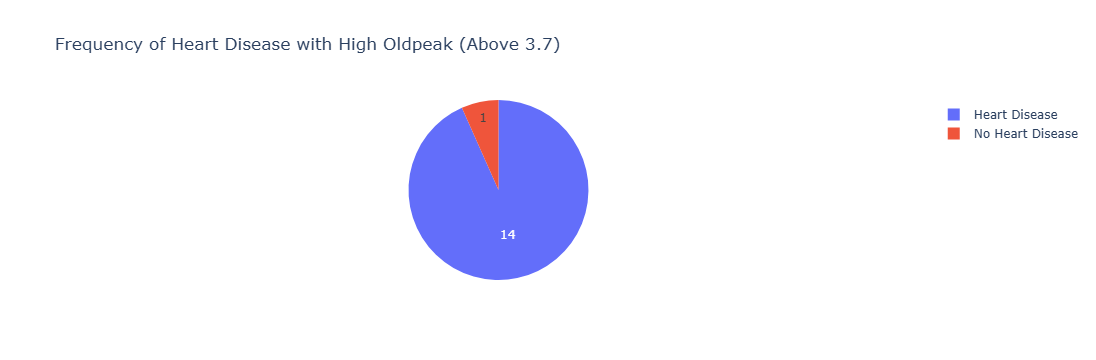

In [16]:
# Filter data for Oldpeak greater than 3.7 and count Heart Disease occurrences
high_oldpeak = heartData[heartData["Oldpeak"] > 3.7]["HeartDisease"].value_counts()

# Create a pie chart
fig = px.pie(
    data_frame=high_oldpeak,
    names=["Heart Disease" if i == 1 else "No Heart Disease" for i in high_oldpeak.index],
    values=high_oldpeak,
    template="plotly_white",
    title="Frequency of Heart Disease with High Oldpeak (Above 3.7)",
)

fig.update_traces(
    textinfo="value",
)

# Show the figure
fig.show()


We can observe that individuals with an Oldpeak value above 3.7 are more likely to have heart disease.

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version

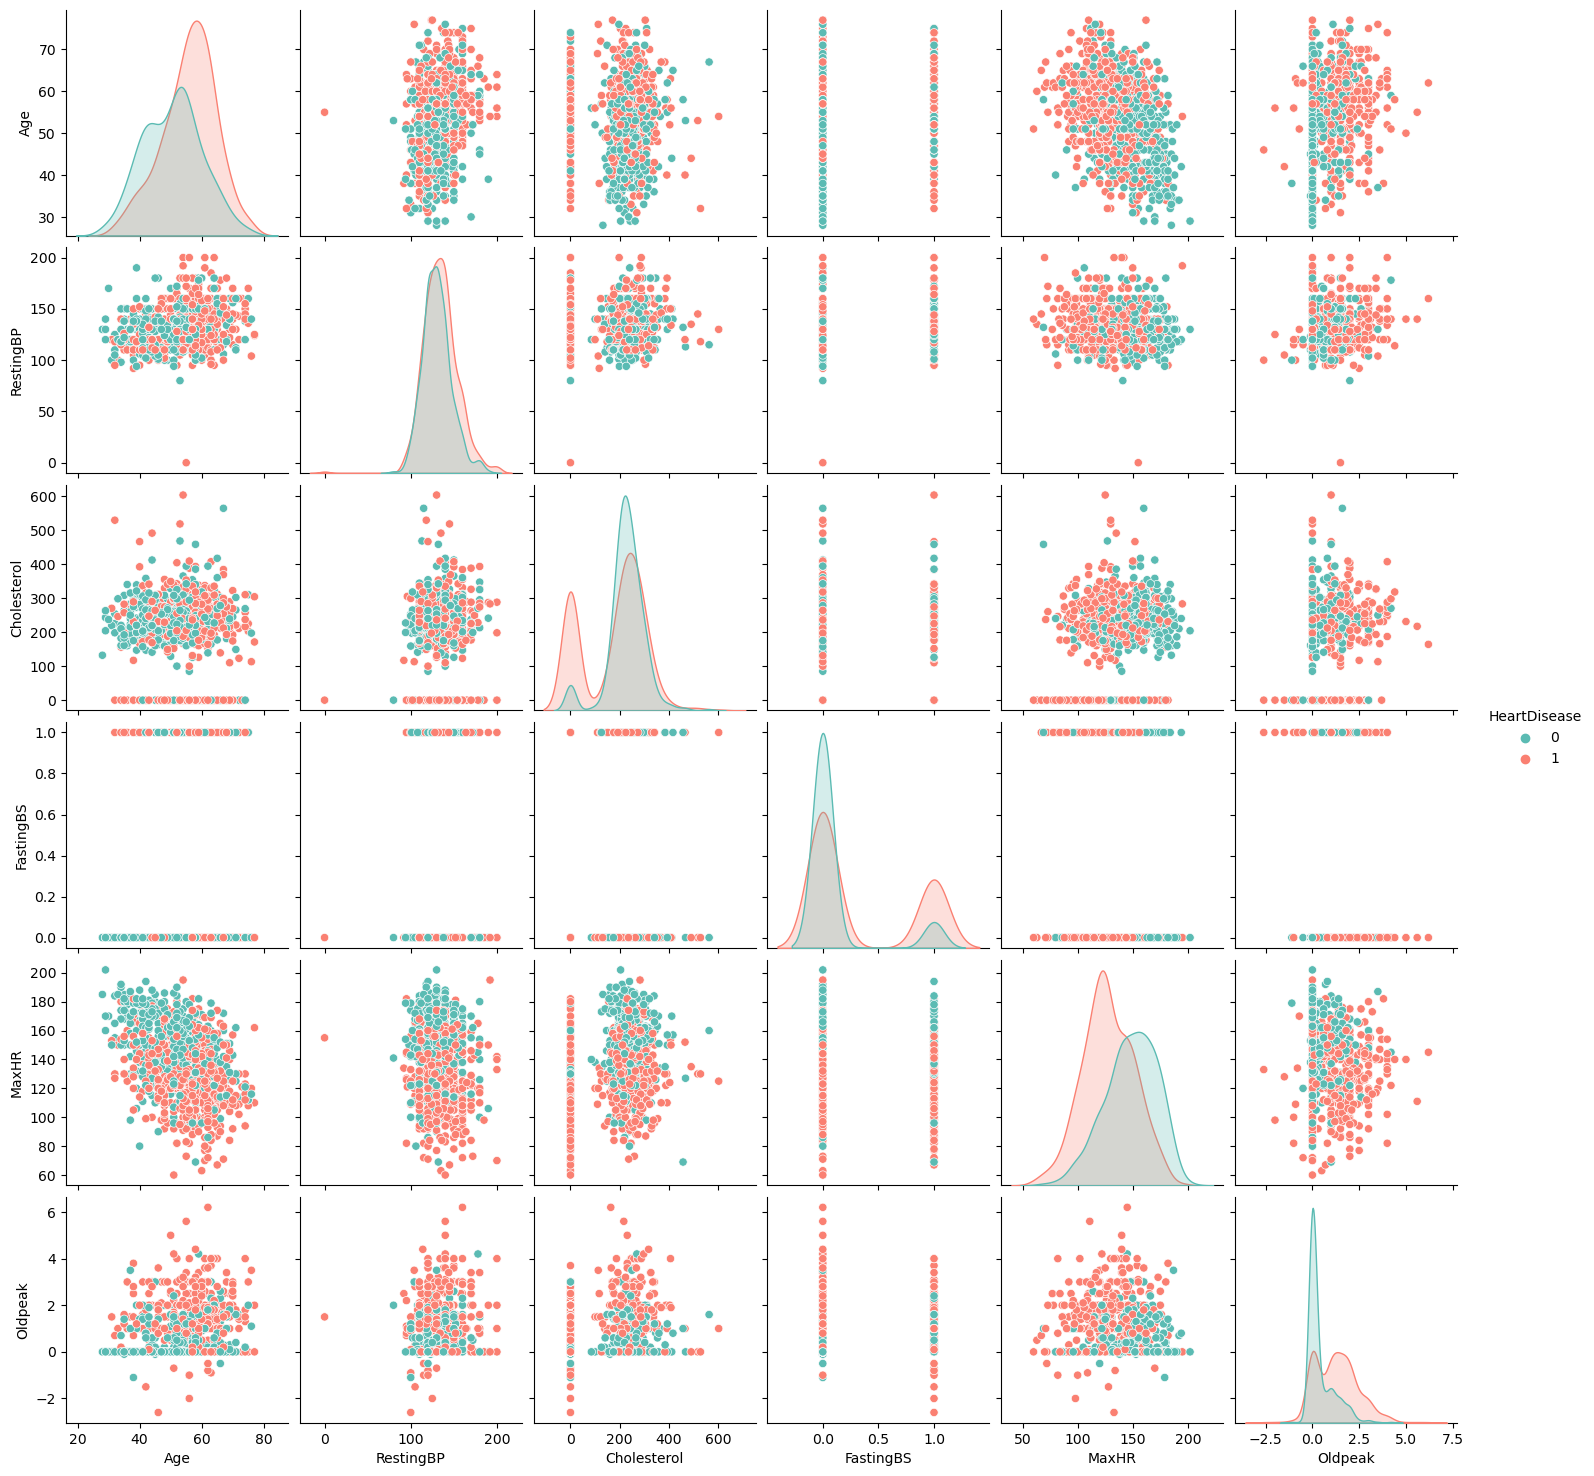

In [17]:
# Pairplot of Numerical Data
sb.pairplot(data=heartData, hue='HeartDisease', palette=['#5BBBB3', 'salmon'])
plt.show()

                   Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.254399    -0.095282   0.198039 -0.382045  0.258612   
RestingBP     0.254399   1.000000     0.100893   0.070193 -0.112135  0.164803   
Cholesterol  -0.095282   0.100893     1.000000  -0.260974  0.235792  0.050148   
FastingBS     0.198039   0.070193    -0.260974   1.000000 -0.131438  0.052698   
MaxHR        -0.382045  -0.112135     0.235792  -0.131438  1.000000 -0.160691   
Oldpeak       0.258612   0.164803     0.050148   0.052698 -0.160691  1.000000   
HeartDisease  0.282039   0.107589    -0.232741   0.267291 -0.400421  0.403951   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol      -0.232741  
FastingBS         0.267291  
MaxHR            -0.400421  
Oldpeak           0.403951  
HeartDisease      1.000000  


<Axes: >

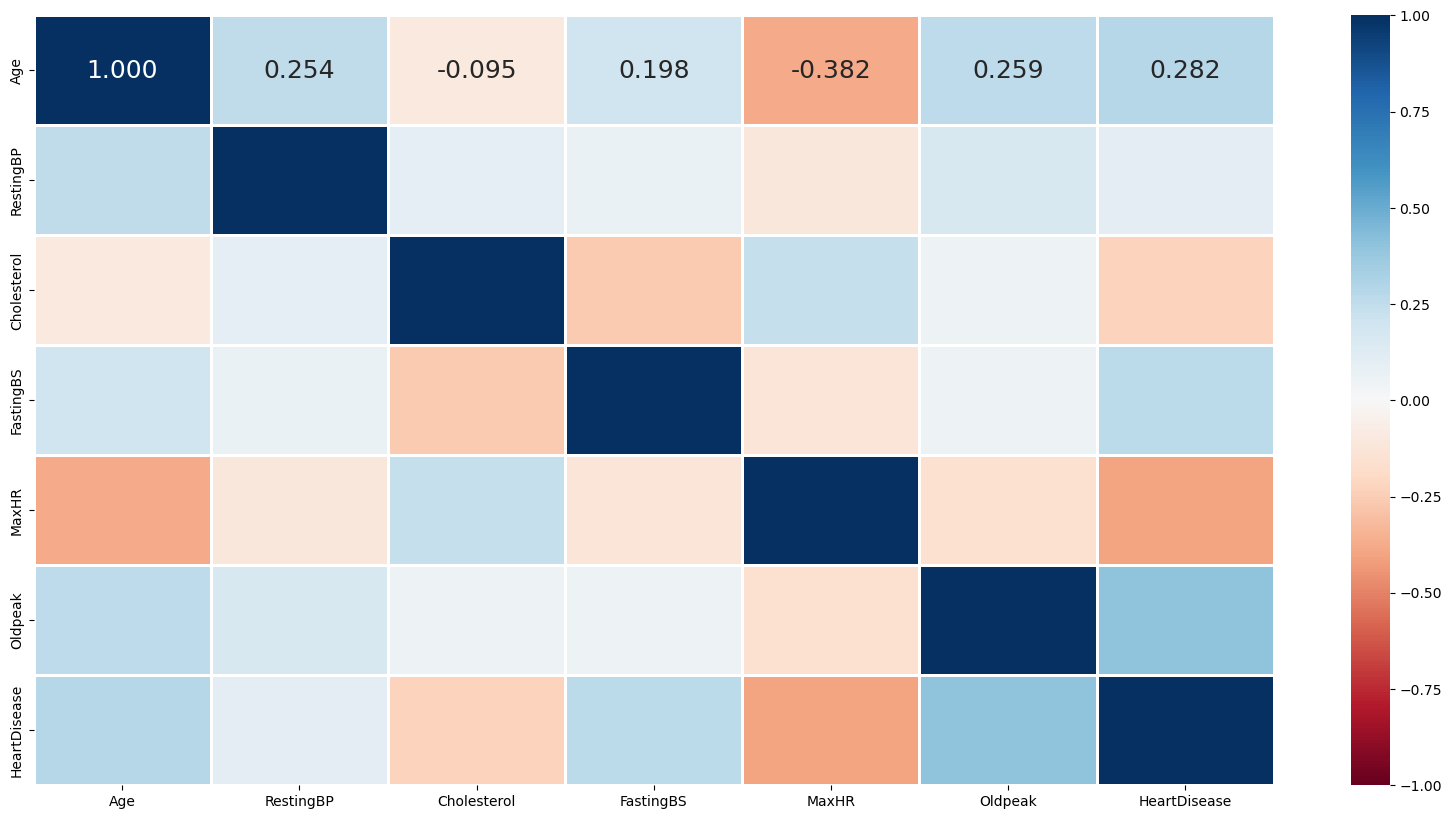

In [18]:
# Filter numeric data
numericHeartData = heartData.select_dtypes(include=[np.number])

# Correlation Matrix for numeric data
print(numericHeartData.corr())

# Heatmap of the Correlation Matrix for numeric data
f = plt.figure(figsize=(20, 10))
sb.heatmap(numericHeartData.corr(), vmin=-1, vmax=1, linewidths=1,
           annot=True, fmt=".3f", annot_kws={"size": 18}, cmap="RdBu")


## Categorical Data

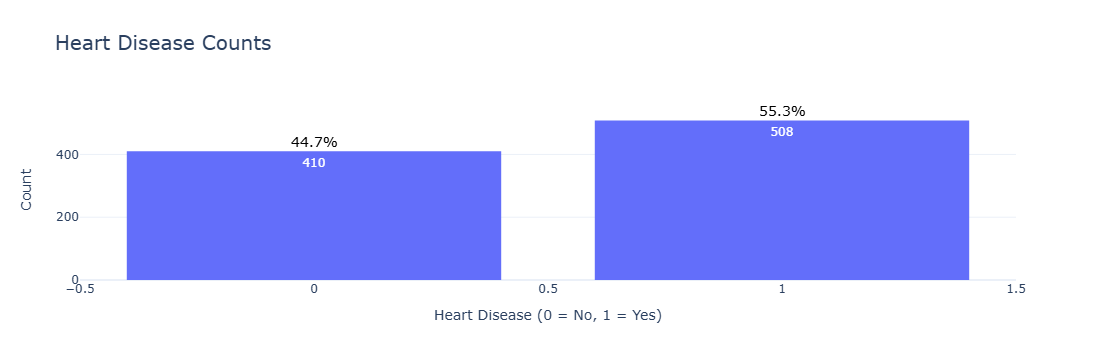

In [19]:
# Create histogram
fig = px.histogram(
    heartData,
    x='HeartDisease',
    barmode='group',
    title='Heart Disease Counts',
    text_auto=True,  # Display count on bars
    template="plotly_white",
)

# Calculate percentage values for each bar
heart_disease_counts = heartData['HeartDisease'].value_counts(normalize=True) * 100
heart_disease_counts = heart_disease_counts.sort_index()

# Add percentage annotations
for i, (heart_disease, pct) in enumerate(heart_disease_counts.items()):
    fig.add_annotation(
        x=heart_disease,
        y=heartData['HeartDisease'].value_counts()[heart_disease],
        text=f"{pct:.1f}%",
        showarrow=False,
        yshift=10,  # Adjust text position above bar
        font=dict(size=14, color="black")
    )

# Separate sections with some spacing
fig.update_xaxes(categoryorder="array", categoryarray=[0, 1])
fig.update_layout(
    bargap=0.2,
    xaxis_title="Heart Disease (0 = No, 1 = Yes)",
    yaxis_title="Count",
    title_font_size=20,
)

fig.show()


**Gender Column**

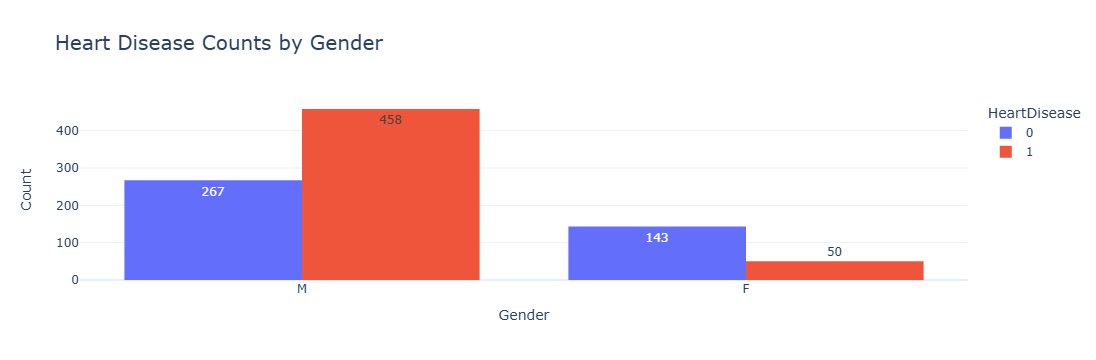

In [20]:
# Create histogram
fig = px.histogram(
    heartData,
    x='Sex',
    text_auto=True,
    color='HeartDisease',
    barmode='group',
    title='Heart Disease Counts by Gender',
    template="plotly_white"
)

# Update the layout for better aesthetics
fig.update_layout(
    bargap=0.2,  # Increase gap between bars for spacing
    xaxis_title="Gender",  # Set x-axis title
    yaxis_title="Count",    # Set y-axis title
    title_font_size=20,     # Increase title font size for better visibility
)

# Show the figure
fig.show()

**Observations:**

1. The majority of patients in the data are male.

2. There are more healthy women than those with health conditions.

**Chest Pain Type Column**

ASY (Asymptomatic): Absence of chest pain, but hints at potential heart issues.

NAP (Non-Anginal Pain): Pain not related to the heart.

TA (Typical Angina): Common heart-related chest pain.

ATA (Atypical Angina): Chest discomfort that's not typical angina.

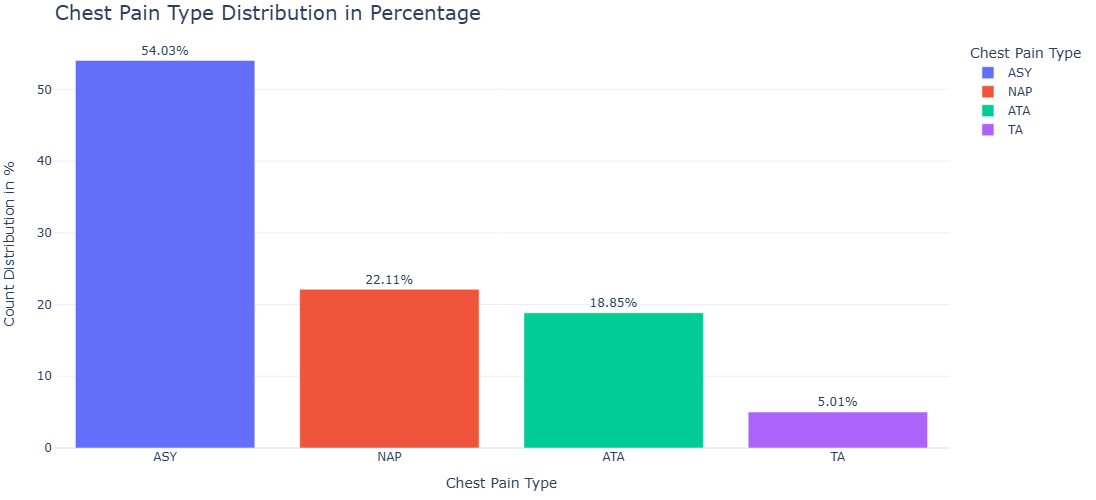

In [21]:
import plotly.express as px

def count_bar_plot(data_frame, column_name, x_title, y_title, title, hover_template):
    # Calculate counts and percentages
    count_data = data_frame[column_name].value_counts(normalize=True) * 100
    count_data = count_data.reset_index()
    count_data.columns = [x_title, y_title]

    # Create the bar plot with color
    fig = px.bar(
        count_data,
        x=x_title,
        y=y_title,
        title=title,
        hover_name=x_title,
        hover_data={y_title: True},  # Show percentage on hover
        text=y_title,  # Display percentage on bars
        template="plotly_white",  # Clean template
        color=x_title  # Color bars based on the x-axis values (Chest Pain Types)
    )

    # Update traces for better text visibility and formatting
    fig.update_traces(
        texttemplate='%{text:.2f}%',  # Show percentages on bars
        textposition='outside'  # Position text outside the bars
    )

    # Update layout
    fig.update_layout(
        xaxis_title=x_title,
        yaxis_title=y_title,
        title_font_size=20,
        height=500,
        margin=dict(l=40, r=40, t=40, b=40),  # Set margins for better layout
        coloraxis_colorbar=dict(title='Chest Pain Type')  # Add a color bar legend
    )

    return fig

# Call the function to create the bar plot
fig = count_bar_plot(
    data_frame=heartData,
    column_name="ChestPainType",
    x_title="Chest Pain Type",
    y_title="Count Distribution in %",
    title="Chest Pain Type Distribution in Percentage",
    hover_template="Chest Pain Type: %{x}<br>Percentage: %{y:.2f}%",  # Show percentage on hover
)

# Show the figure
fig.show()


In [22]:
freq = heartData["HeartDisease"] == 1
heartDatafreq = heartData[freq].copy()
chest_pain_with_disease = heartDatafreq["ChestPainType"].value_counts(normalize=1)*100
chest_pain_with_disease

ChestPainType
ASY    77.165354
NAP    14.173228
ATA     4.724409
TA      3.937008
Name: proportion, dtype: float64

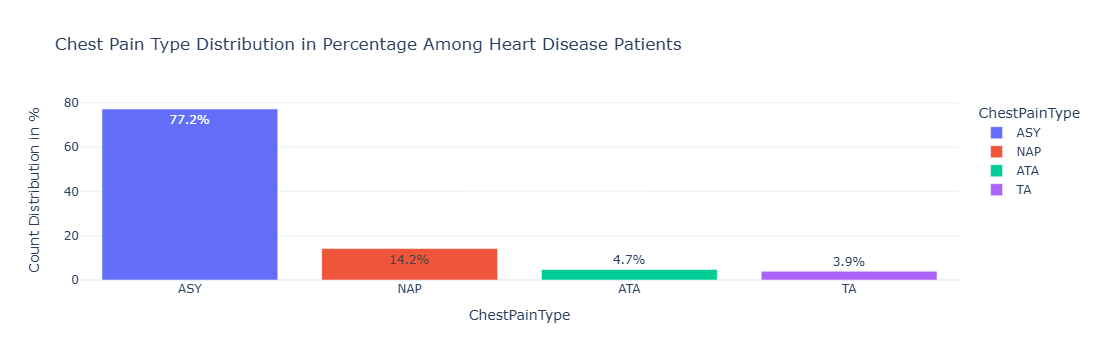

In [23]:
fig = px.bar(
    data_frame=chest_pain_with_disease,
    x = chest_pain_with_disease.index,
    y=chest_pain_with_disease,
    color=chest_pain_with_disease.index,
    labels={"x" :"ChestPainType", "y": "Count Distribution in %"},
    text=chest_pain_with_disease.apply(lambda x: f"{x:0.1f}%"),
    title = "Chest Pain Type Distribution in Percentage Among Heart Disease Patients",
    template="plotly_white",
)

fig.show()

**Observation:**

The most common type of chest pain associated with the disease is ASY (Asymptomatic), while the least frequent type is TA (Typical Angina).

**Exercise Angina Column**

Exercise-induced angina

Y: Have exercise-induced angina

N: Do not have exercise-induced angina



Exercise-induced Angina: Does physical activity trigger pain? If so, it could be a warning sign.

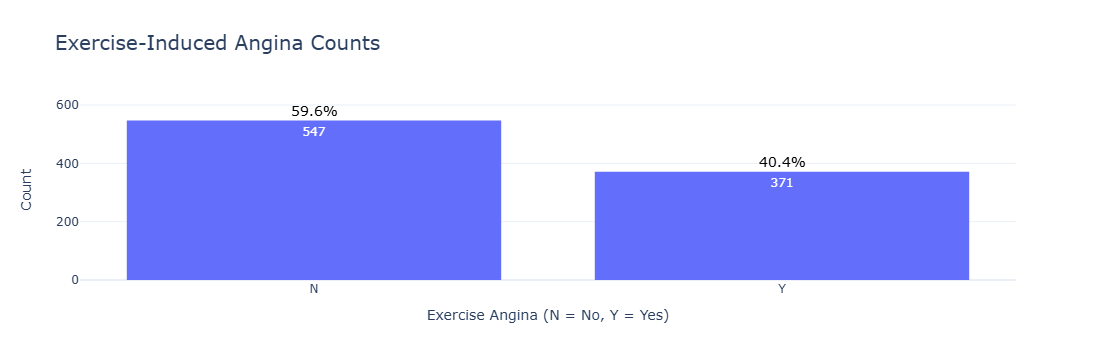

In [24]:
# Create histogram
fig = px.histogram(
    heartData,
    x='ExerciseAngina',
    barmode='group',
    text_auto=True,
    title='Exercise-Induced Angina Counts',
    template="plotly_white",
)

# Calculate percentage values for each bar
exercise_angina_counts = heartData['ExerciseAngina'].value_counts(normalize=True) * 100

# Add percentage annotations
for i, (angina_type, pct) in enumerate(exercise_angina_counts.items()):
    count = heartData['ExerciseAngina'].value_counts()[angina_type]
    fig.add_annotation(
        x=angina_type,
        y=count,
        text=f"{pct:.1f}%",
        showarrow=False,
        yshift=10,
        font=dict(size=14, color="black")
    )

# Update layout for aesthetics
fig.update_layout(
    bargap=0.2,
    xaxis_title="Exercise Angina (N = No, Y = Yes)",
    yaxis_title="Count",
    title_font_size=20,
)

# Show the figure
fig.show()

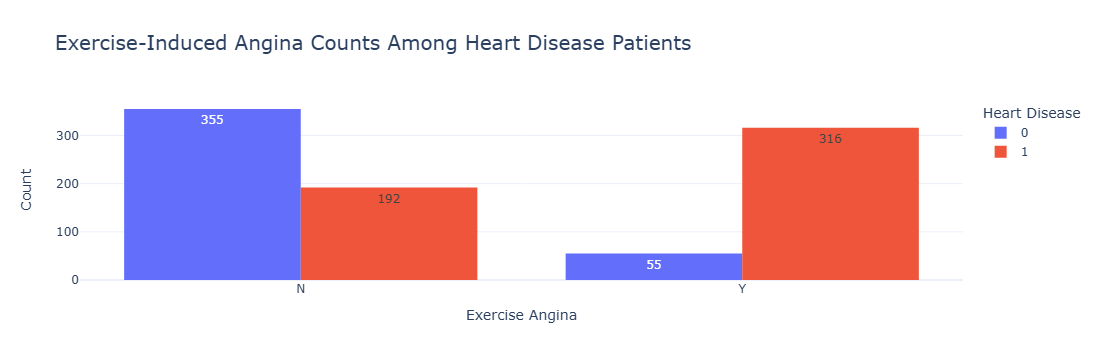

In [25]:
# Create histogram
fig = px.histogram(
    heartData,
    x='ExerciseAngina',
    color='HeartDisease',
    barmode='group',
    text_auto=True,  # Display count on bars
    title='Exercise-Induced Angina Counts Among Heart Disease Patients',
    template="plotly_white",
)

# Update the layout for better aesthetics
fig.update_layout(
    bargap=0.2,
    xaxis_title="Exercise Angina",
    yaxis_title="Count",
    title_font_size=20,
    legend_title="Heart Disease",
)

# Show the figure
fig.show()


**Observations:**

For individuals without Exercise Angina:
There are more healthy individuals than patients.

For individuals with Exercise Angina:
The number of patients is more than the number of healthy individuals.

**ECG Results Column**

RestingECG (Resting ElectroCardioGraphic) shows the results of an ECG (electrocardiogram) test that measures the heart's electrical activity
- Normal: Normal
- ST: Having ST-T wave abnormalities (indications of minor irregularities in the heart's electrical activity)
- LVH: Showing probable or definite "Left Ventricular Hypertrophy" by Estes' criteria

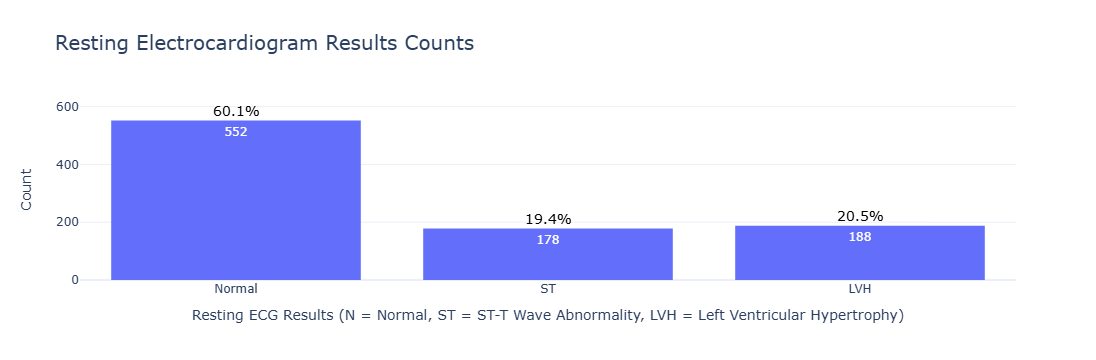

In [26]:
# Create histogram for RestingECG
fig = px.histogram(
    heartData,
    x='RestingECG',
    barmode='group',
    text_auto=True,
    title='Resting Electrocardiogram Results Counts',
    template="plotly_white",
)

# Calculate percentage values for each RestingECG category
resting_ecg_counts = heartData['RestingECG'].value_counts(normalize=True) * 100

# Add percentage annotations
for i, (ecg_type, pct) in enumerate(resting_ecg_counts.items()):
    count = heartData['RestingECG'].value_counts()[ecg_type]
    fig.add_annotation(
        x=ecg_type,
        y=count,
        text=f"{pct:.1f}%",
        showarrow=False,
        yshift=10,
        font=dict(size=14, color="black")
    )

# Update layout for aesthetics
fig.update_layout(
    bargap=0.2,
    xaxis_title="Resting ECG Results\n(N = Normal, ST = ST-T Wave Abnormality, LVH = Left Ventricular Hypertrophy)",
    yaxis_title="Count",
    title_font_size=20,
)

# Show the figure
fig.show()

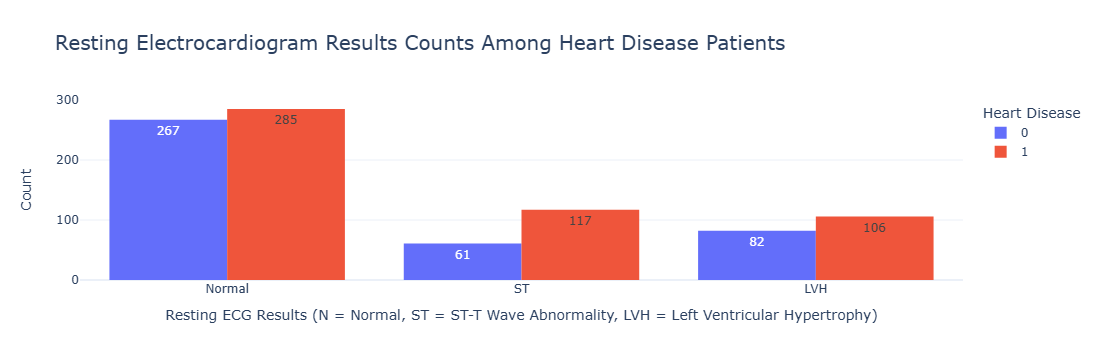

In [27]:
# Create histogram for RestingECG
fig = px.histogram(
    heartData,
    x='RestingECG',
    color='HeartDisease',
    barmode='group',
    text_auto=True,
    title='Resting Electrocardiogram Results Counts Among Heart Disease Patients',
    template="plotly_white",
)

# Update the layout for better aesthetics
fig.update_layout(
    bargap=0.2,
    xaxis_title="Resting ECG Results\n(N = Normal, ST = ST-T Wave Abnormality, LVH = Left Ventricular Hypertrophy)",  # Set x-axis title
    yaxis_title="Count",
    title_font_size=20,
    legend_title="Heart Disease",
)

# Show the figure
fig.show()

**Fasting Blood Sugar Column**

FastingBS (Fasting Blood Sugar) → This column indicates whether the patient's fasting blood sugar is greater than 120 mg/dl
- 1 (true): if the fasting blood sugar is greater than 120 mg/dl
- 0 (false) otherwise

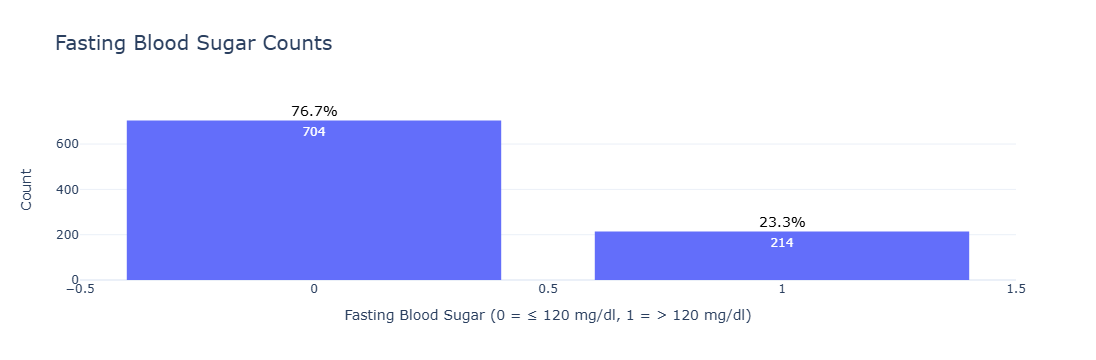

In [28]:
# Create histogram
fig = px.histogram(
    heartData,
    x='FastingBS',
    barmode='group',
    title='Fasting Blood Sugar Counts',
    text_auto=True,
    template="plotly_white",
)

# Calculate percentage values for each bar
fasting_bs_counts = heartData['FastingBS'].value_counts(normalize=True) * 100
fasting_bs_counts = fasting_bs_counts.sort_index()

# Add percentage annotations
for i, (fasting_bs, pct) in enumerate(fasting_bs_counts.items()):
    fig.add_annotation(
        x=fasting_bs,
        y=heartData['FastingBS'].value_counts()[fasting_bs],
        text=f"{pct:.1f}%",
        showarrow=False,
        yshift=10,
        font=dict(size=14, color="black")
    )

# Separate sections with some spacing
fig.update_xaxes(categoryorder="array", categoryarray=[0, 1])
fig.update_layout(
    bargap=0.2,
    xaxis_title="Fasting Blood Sugar (0 = ≤ 120 mg/dl, 1 = > 120 mg/dl)",
    yaxis_title="Count",
    title_font_size=20,
)

fig.show()

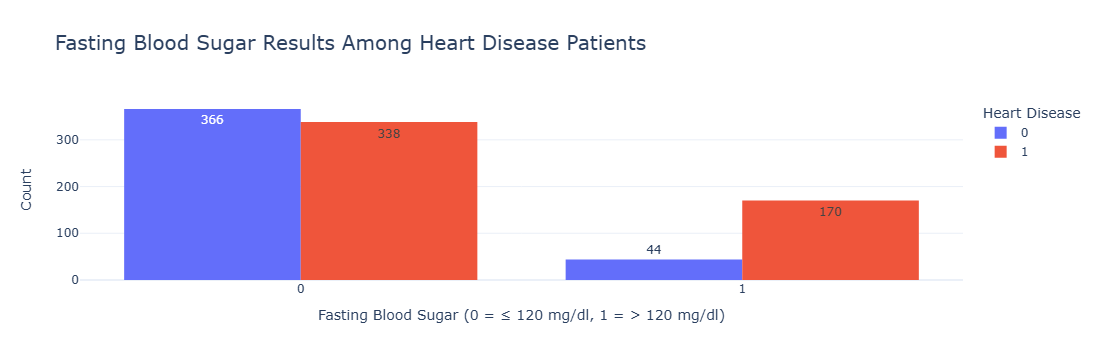

In [29]:
# Create histogram for Fasting Blood Sugar
fig = px.histogram(
    heartData,
    x='FastingBS',
    color='HeartDisease',
    barmode='group',
    text_auto=True,
    title='Fasting Blood Sugar Results Among Heart Disease Patients',
    template="plotly_white",
)

# Update the layout for better aesthetics
fig.update_layout(
    bargap=0.2,
    xaxis_title="Fasting Blood Sugar\n(0 = ≤ 120 mg/dl, 1 = > 120 mg/dl)",  # Set x-axis title
    yaxis_title="Count",
    title_font_size=20,
    legend_title="Heart Disease",
)

# Show the figure
fig.show()

**ST Slope Column**

The slope of the peak exercise ST segment
- Up: upsloping
- Flat: flat
- Down: downsloping

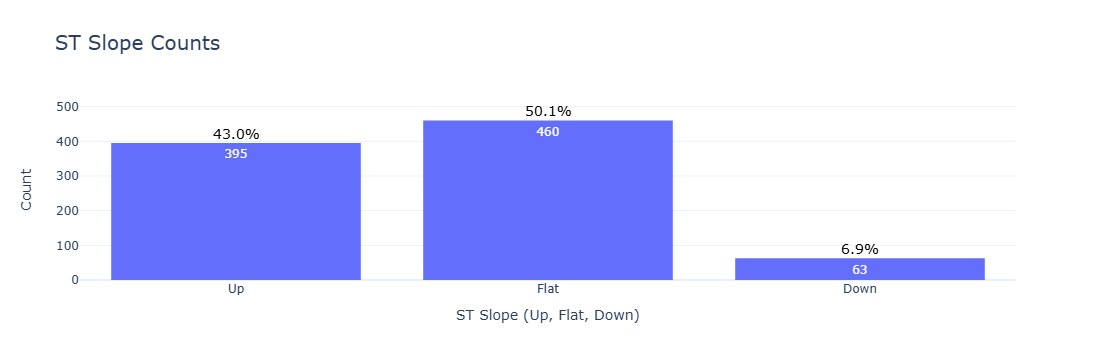

In [30]:
# Create histogram
fig = px.histogram(
    heartData,
    x='ST_Slope',
    barmode='group',
    title='ST Slope Counts',
    text_auto=True,
    template="plotly_white",
)

# Calculate percentage values for each bar
st_slope_counts = heartData['ST_Slope'].value_counts(normalize=True) * 100
st_slope_counts = st_slope_counts.sort_index()

# Add percentage annotations
for i, (st_slope, pct) in enumerate(st_slope_counts.items()):
    fig.add_annotation(
        x=st_slope,
        y=heartData['ST_Slope'].value_counts()[st_slope],
        text=f"{pct:.1f}%",
        showarrow=False,
        yshift=10,
        font=dict(size=14, color="black")
    )

# Separate sections with some spacing
fig.update_xaxes(categoryorder="array", categoryarray=['Up', 'Flat', 'Down'])
fig.update_layout(
    bargap=0.2,
    xaxis_title="ST Slope (Up, Flat, Down)",
    yaxis_title="Count",
    title_font_size=20,
)

fig.show()

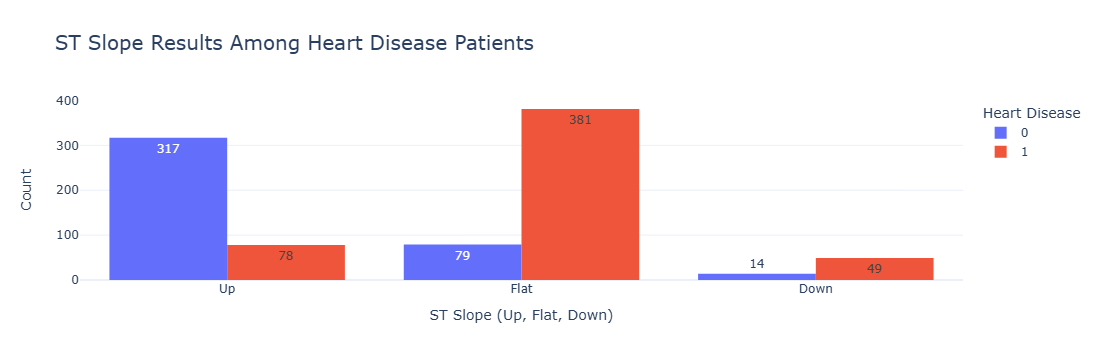

In [31]:
# Create histogram for ST Slope
fig = px.histogram(
    heartData,
    x='ST_Slope',
    color='HeartDisease',
    barmode='group',
    text_auto=True,
    title='ST Slope Results Among Heart Disease Patients',
    template="plotly_white",
)

# Update the layout for better aesthetics
fig.update_layout(
    bargap=0.2,
    xaxis_title="ST Slope\n(Up, Flat, Down)",  # Set x-axis title
    yaxis_title="Count",
    title_font_size=20,
    legend_title="Heart Disease",
)

# Show the figure
fig.show()

# **Random Forest Classification**

# **1. Random Forest Classifier**

In [32]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
heartData = pd.read_csv("heart.csv")

# Convert categorical variables to numerical using one-hot encoding
heartData_encoded = pd.get_dummies(heartData, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

# Split features and target variable
X = heartData_encoded.drop(columns=['HeartDisease'])
y = heartData_encoded['HeartDisease']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on the train set and test set
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calculate accuracy for train and test datasets
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Output the results
print("Train Dataset Metrics:")
print("Accuracy:", accuracy_train)
print("\nConfusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

print("\nTest Dataset Metrics:")
print("Accuracy:", accuracy_test)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

# Print classification report for test dataset
print("\nClassification Report for Test Dataset:")
print(classification_report(y_test, y_test_pred))

Train Dataset Metrics:
Accuracy: 1.0

Confusion Matrix:
[[333   0]
 [  0 401]]

Test Dataset Metrics:
Accuracy: 0.8804347826086957

Confusion Matrix:
[[67 10]
 [12 95]]

Classification Report for Test Dataset:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        77
           1       0.90      0.89      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



# **2. Hyperparameter tuning with RandomizedSearchCV**

n_estimator: this sets the number of decision trees in the random forest

max_depth: this sets the maximum depth of each decision tree. Limiting depth (e.g., 10, 20, 30, etc.) prevents each tree from growing too complex, reducing overfitting by focusing on larger patterns rather than small details

min_samples_split: this is the minimum number of samples required to split an internal node (a node that has children)

min_samples_leaf: this is the minimum number of samples that must be present in a leaf node (a node with no children)

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Load the dataset
heartData = pd.read_csv("heart.csv")

# Convert categorical variables to numerical using one-hot encoding
heartData_encoded = pd.get_dummies(heartData, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

# Split features and target variable
X = heartData_encoded.drop(columns=['HeartDisease'])
y = heartData_encoded['HeartDisease']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter grid for Random Forest
param_dist = {
    'n_estimators': np.arange(100, 500, 100),  # Number of trees
    'max_depth': [None, 10, 20, 30, 40, 50],  # Max depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples to be at a leaf node
    'bootstrap': [True, False],  # Whether bootstrap samples are used when building trees
    'max_features': ['sqrt', 'log2', None]  # Updated max_features options
}

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                   n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search to find the best hyperparameters
random_search.fit(X_train, y_train)

# Output the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}


# **3. Random Forest Classifier with Best Hyperparameters**

n_estimators: 300 - this is the number of trees in the random forest. Using 300 trees provides more model stability and better accuracy.

min_samples_split: 2 - the minimum number of samples required to split a node. A value of 2 allows splitting with minimal samples, helping capture finer patterns.

min_samples_leaf: 1 - the minimum number of samples allowed at a leaf node. A value of 1 allows leaves to contain a single sample, potentially creating more detailed trees.

max_features: 'sqrt' - the number of features considered when looking for the best split. Setting this to 'sqrt' uses a subset of the features, which helps reduce overfitting and makes training faster.

max_depth: 20 - the maximum depth of each tree. This restricts the tree's growth to 20 layers, balancing complexity and generalization.

bootstrap: True - this enables bootstrapping, meaning each tree is trained on a random subset of the data, which adds variety and helps reduce overfitting.

In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Get the best model with the optimal hyperparameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)

# Fit the model with the training data
best_rf_model.fit(X_train, y_train)

# Predict on the train and test sets
y_train_pred = best_rf_model.predict(X_train)
y_test_pred = best_rf_model.predict(X_test)

# Calculate accuracy for train and test datasets
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Output the results
print("\nTrain Dataset Metrics:")
print("Accuracy:", accuracy_train)
print("\nConfusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

print("\nTest Dataset Metrics:")
print("Accuracy:", accuracy_test)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

# Print classification report for test dataset
print("\nClassification Report for Test Dataset:")
print(classification_report(y_test, y_test_pred))


Train Dataset Metrics:
Accuracy: 1.0

Confusion Matrix:
[[333   0]
 [  0 401]]

Test Dataset Metrics:
Accuracy: 0.8858695652173914

Confusion Matrix:
[[67 10]
 [11 96]]

Classification Report for Test Dataset:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86        77
           1       0.91      0.90      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



## **4. Feature Importance Analysis**

This analysis identifies and visualizes the features that contribute most to the predictions made by the Random Forest model.

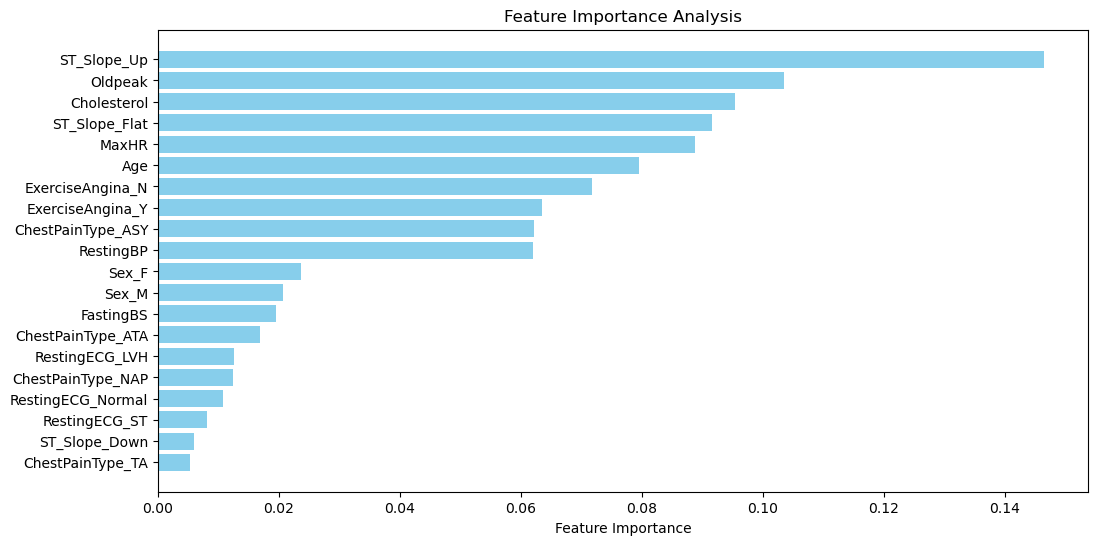

In [35]:
# Feature importance analysis
importance = best_rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance Analysis')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

'ST_Slope_Up' (the slope of the peak exercise ST segment - upsloping) contributes the most to heart disease.

# Logistics Regression

## **1. Importing Necessary Libraries**

* pandas: Used for data manipulation and handling data structures.
* train_test_split: Splits the data into training and testing sets.
* LogisticRegression: Implements logistic regression for binary classification.
* accuracy_score, classification_report, confusion_matrix: Metrics for evaluating model performance.
* StandardScaler: Scales features for better performance in logistic regression.
* numpy: Provides tools for numerical operations, such as rounding probabilities.

In [36]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np


## **2. Function to Load and Preprocess the Data**

* Load the Dataset: Reads the CSV file containing the dataset.
* One-Hot Encoding: Converts categorical variables (Sex, ChestPainType, etc.) into binary columns using one-hot encoding.
* Define Features (X) and Target (y): Drops the target column (HeartDisease) from the feature set and assigns it as y.
* Return Preprocessed Data: Returns X (features) and y (target variable) for further processing.

In [37]:

# Function to load and preprocess the data
def preprocess_data(file_path):
    # Load the dataset
    data = pd.read_csv(file_path)

    # One-hot encoding for nominal categorical variables
    categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
    data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

    # Define features and target variable
    X = data_encoded.drop(columns=['HeartDisease'])
    y = data_encoded['HeartDisease']

    return X, y

## **3. Load and Split the data**

* Load Data: Calls the preprocess_data function with the path to the dataset to get X and y.

* Training and Testing Split: Divides the data into training (80%) and testing (20%) sets, setting a random state for reproducibility.

In [38]:
file_path = "heart.csv"
X, y = preprocess_data(file_path)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **4. Standardize the Features**

* Initialize Scaler: Creates an instance of StandardScaler.
* Fit and Transform: Standardizes X_train and applies the same scaling to X_test to improve logistic regression performance.


In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## **5. Initialize and Fit the Model**
* Model Setup: Initializes logistic regression with a maximum iteration limit of 1000 to ensure convergence.
* Train Model: Fits the logistic regression model on the scaled training data.

In [40]:
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, random_state=42)

## **6. Predict on the Train and Test Sets**

* Generate Predictions: Uses the trained model to predict labels for both the training and testing sets.

In [41]:
y_train_pred = logistic_model.predict(X_train_scaled)
y_test_pred = logistic_model.predict(X_test_scaled)

## **7. Calculate Accuracy for Train and Test Sets**

* Accuracy Calculation: Computes accuracy for both the training and testing sets.


In [42]:
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

## **8. Output Train and Test Dataset Metrics**



In [43]:
print("Train Dataset Metrics:")
print("Accuracy:", accuracy_train)
print("\nConfusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("\nTest Dataset Metrics:")
print("Accuracy:", accuracy_test)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Train Dataset Metrics:
Accuracy: 0.8719346049046321

Confusion Matrix:
[[280  53]
 [ 41 360]]

Test Dataset Metrics:
Accuracy: 0.8532608695652174

Confusion Matrix:
[[67 10]
 [17 90]]


## **9. Print Classification Report for Test Dataset**

In [44]:
print("\nClassification Report for Test Dataset:")
print(classification_report(y_test, y_test_pred))



Classification Report for Test Dataset:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



## **10. Doing the Probability and Displaying the results of the DataFrame with a background gradient**

* Probability Prediction: Generates probabilities for each test instance belonging to the positive class (heart disease).
* Show Sample Probabilities: Rounds and displays probabilities for the first 10 test instances for easier readability.
* highlight_predicted_class : utilized to create vibrance within the table

In [45]:
# Predict probabilities for the test set
y_test_prob = logistic_model.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for the positive class

# Create a DataFrame to hold the test data, actual class, predicted probabilities, and predicted class
results_df = X_test.copy()  # Start with the test features
results_df['Actual Class'] = y_test.values  # Add the actual class
results_df['Predicted Probability'] = y_test_prob  # Add the predicted probabilities
results_df['Predicted Class'] = y_test_pred  # Add the predicted class

# Function to apply color to Predicted Class
def highlight_predicted_class(val):
    color = 'background-color: lightgreen' if val == 1 else 'background-color: lightcoral'
    return color

# Display the first 10 rows of the DataFrame with a background gradient
styled_results = results_df.head(10).style \
    .background_gradient(subset=['Predicted Probability']) \
    .applymap(highlight_predicted_class, subset=['Predicted Class'])

styled_results

C:\Users\HP\AppData\Local\Temp\ipykernel_25776\1453682967.py:18: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.



## **COMPLETE FORM**

## **1st Logistic Regression**

In [46]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np

# Function to load and preprocess the data
def preprocess_data(file_path):
    # Load the dataset
    data = pd.read_csv(file_path)

    # One-hot encoding for nominal categorical variables
    categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
    data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

    # Define features and target variable
    X = data_encoded.drop(columns=['HeartDisease'])
    y = data_encoded['HeartDisease']

    return X, y

# Load and preprocess the data
file_path = "heart.csv"
X, y = preprocess_data(file_path)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional, but recommended for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model
logistic_model.fit(X_train_scaled, y_train)

# Predict on the train set and test set
y_train_pred = logistic_model.predict(X_train_scaled)
y_test_pred = logistic_model.predict(X_test_scaled)

# Calculate accuracy for train and test datasets
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Output metrics and confusion matrices
print("Train Dataset Metrics:")
print("Accuracy:", accuracy_train)
print("\nConfusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

print("\nTest Dataset Metrics:")
print("Accuracy:", accuracy_test)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

# Predict probabilities for the test set
y_test_prob = logistic_model.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for the positive class

# Create a DataFrame to hold the test data, actual class, predicted probabilities, and predicted class
results_df = X_test.copy()  # Start with the test features
results_df['Actual Class'] = y_test.values  # Add the actual class
results_df['Predicted Probability'] = y_test_prob  # Add the predicted probabilities
results_df['Predicted Class'] = y_test_pred  # Add the predicted class

# Function to apply color to Predicted Class
def highlight_predicted_class(val):
    color = 'background-color: lightgreen' if val == 1 else 'background-color: lightcoral'
    return color

# Display the first 10 rows of the DataFrame with a background gradient
styled_results = results_df.head(10).style \
    .background_gradient(subset=['Predicted Probability']) \
    .applymap(highlight_predicted_class, subset=['Predicted Class'])

styled_results


Train Dataset Metrics:
Accuracy: 0.8719346049046321

Confusion Matrix:
[[280  53]
 [ 41 360]]

Test Dataset Metrics:
Accuracy: 0.8532608695652174

Confusion Matrix:
[[67 10]
 [17 90]]


C:\Users\HP\AppData\Local\Temp\ipykernel_25776\631610278.py:78: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.



In [47]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np

# Function to load and preprocess the data
def preprocess_data(file_path):
    # Load the dataset
    data = pd.read_csv(file_path)

    # One-hot encoding for nominal categorical variables
    categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
    data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

    # Define features and target variable
    X = data_encoded.drop(columns=['HeartDisease'])
    y = data_encoded['HeartDisease']

    return X, y

# Load and preprocess the data
file_path = "heart.csv"
X, y = preprocess_data(file_path)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional, but recommended for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model
logistic_model.fit(X_train_scaled, y_train)

# Predict on the train set and test set
y_train_pred = logistic_model.predict(X_train_scaled)
y_test_pred = logistic_model.predict(X_test_scaled)

# Calculate accuracy for train and test datasets
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Output metrics and confusion matrices
print("Train Dataset Metrics:")
print("Accuracy:", accuracy_train)
print("\nConfusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

print("\nTest Dataset Metrics:")
print("Accuracy:", accuracy_test)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

# Predict probabilities for the test set
y_test_prob = logistic_model.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for the positive class

# Create a DataFrame to hold the test data, actual class, predicted probabilities, and predicted class
results_df = X_test.copy()  # Start with the test features
results_df['Actual Class'] = y_test.values  # Add the actual class
results_df['Predicted Probability'] = y_test_prob  # Add the predicted probabilities
results_df['Predicted Class'] = y_test_pred  # Add the predicted class

# Select the specified columns
selected_columns = ['MaxHR', 'Cholesterol', 'ST_Slope_Up', 'Actual Class', 'Predicted Probability', 'Predicted Class']
results_df = results_df[selected_columns]

# Function to apply color to Predicted Class
def highlight_predicted_class(val):
    color = 'background-color: lightgreen' if val == 1 else 'background-color: lightcoral'
    return color

# Display the first 10 rows of the DataFrame with a background gradient
styled_results = results_df.head(10).style \
    .background_gradient(subset=['Predicted Probability']) \
    .applymap(highlight_predicted_class, subset=['Predicted Class'])

styled_results


Train Dataset Metrics:
Accuracy: 0.8719346049046321

Confusion Matrix:
[[280  53]
 [ 41 360]]

Test Dataset Metrics:
Accuracy: 0.8532608695652174

Confusion Matrix:
[[67 10]
 [17 90]]


C:\Users\HP\AppData\Local\Temp\ipykernel_25776\1344541413.py:82: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.



## **2nd Logistic Regression:**

In [48]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load the dataset
heartData = pd.read_csv("heart.csv")

# Convert categorical variables to numerical using one-hot encoding
heartData_encoded = pd.get_dummies(heartData, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)

# Split features and target variable
X = heartData_encoded.drop(columns=['HeartDisease'])
y = heartData_encoded['HeartDisease']

# Split data into train and test sets with stratification for class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the second Logistic Regression model with stronger regularization and 'liblinear' solver
logistic_model_2 = LogisticRegression(C=0.5, solver='liblinear', max_iter=1000, random_state=42)

# Fit the model
logistic_model_2.fit(X_train_scaled, y_train)

# Predict on the train set and test set
y_train_pred_2 = logistic_model_2.predict(X_train_scaled)
y_test_pred_2 = logistic_model_2.predict(X_test_scaled)

# Predict probabilities for the test set
y_test_prob_2 = logistic_model_2.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for the positive class

# Calculate the accuracy for train and test sets
accuracy_train_2 = accuracy_score(y_train, y_train_pred_2)
accuracy_test_2 = accuracy_score(y_test, y_test_pred_2)

# Create a DataFrame to hold the test data, actual class, predicted probabilities, and predicted class
results_df_2 = X_test.copy()  # Start with the test features
results_df_2['Actual Class'] = y_test.values  # Add the actual class
results_df_2['Predicted Probability'] = y_test_prob_2  # Add the predicted probabilities
results_df_2['Predicted Class'] = y_test_pred_2  # Add the predicted class

# Function to apply color to Predicted Class
def highlight_predicted_class(val):
    color = 'background-color: lightgreen' if val == 1 else 'background-color: lightcoral'
    return color

# Display the first 10 rows of the DataFrame with a background gradient for probability and class coloring
styled_results_2 = results_df_2.head(10).style \
    .background_gradient(subset=['Predicted Probability']) \
    .applymap(highlight_predicted_class, subset=['Predicted Class'])

# Print Train Dataset Metrics
print("Train Dataset Metrics (Second Logistic Regression):")
print(f"Accuracy: {accuracy_train_2:.16f}\n")
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred_2))
print()

# Print Test Dataset Metrics
print("Test Dataset Metrics (Second Logistic Regression):")
print(f"Accuracy: {accuracy_test_2:.16f}\n")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_2))

# Display the styled results DataFrame
styled_results_2


Train Dataset Metrics (Second Logistic Regression):
Accuracy: 0.8610354223433242

Confusion Matrix:
[[271  57]
 [ 45 361]]

Test Dataset Metrics (Second Logistic Regression):
Accuracy: 0.8858695652173914

Confusion Matrix:
[[68 14]
 [ 7 95]]


C:\Users\HP\AppData\Local\Temp\ipykernel_25776\2866118535.py:57: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.



In [49]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load the dataset
heartData = pd.read_csv("heart.csv")

# Convert categorical variables to numerical using one-hot encoding
heartData_encoded = pd.get_dummies(heartData, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)

# Split features and target variable
X = heartData_encoded.drop(columns=['HeartDisease'])
y = heartData_encoded['HeartDisease']

# Split data into train and test sets with stratification for class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the second Logistic Regression model with stronger regularization and 'liblinear' solver
logistic_model_2 = LogisticRegression(C=0.5, solver='liblinear', max_iter=1000, random_state=42)

# Fit the model
logistic_model_2.fit(X_train_scaled, y_train)

# Predict on the train set and test set
y_train_pred_2 = logistic_model_2.predict(X_train_scaled)
y_test_pred_2 = logistic_model_2.predict(X_test_scaled)

# Predict probabilities for the test set
y_test_prob_2 = logistic_model_2.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for the positive class

# Create a DataFrame to hold the test data, actual class, predicted probabilities, and predicted class
results_df_2 = X_test.copy()  # Start with the test features
results_df_2['Actual Class'] = y_test.values  # Add the actual class
results_df_2['Predicted Probability'] = y_test_prob_2  # Add the predicted probabilities
results_df_2['Predicted Class'] = y_test_pred_2  # Add the predicted class

# Select only the columns of interest
columns_of_interest = ['MaxHR', 'Cholesterol', 'ST_Slope_Up', 'Actual Class', 'Predicted Probability', 'Predicted Class']
results_df_2_selected = results_df_2[columns_of_interest]

# Function to apply color to Predicted Class
def highlight_predicted_class(val):
    color = 'background-color: lightgreen' if val == 1 else 'background-color: lightcoral'
    return color

# Display the first 10 rows of the selected columns with background gradient for predicted probability and class coloring
styled_results_2 = results_df_2_selected.head(10).style \
    .background_gradient(subset=['Predicted Probability']) \
    .applymap(highlight_predicted_class, subset=['Predicted Class'])

# Print Train Dataset Metrics
print("Train Dataset Metrics (Second Logistic Regression):")
print(f"Accuracy: {accuracy_train_2:.16f}\n")
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred_2))
print()

# Print Test Dataset Metrics
print("Test Dataset Metrics (Second Logistic Regression):")
print(f"Accuracy: {accuracy_test_2:.16f}\n")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_2))

# Display the styled results DataFrame
styled_results_2


Train Dataset Metrics (Second Logistic Regression):
Accuracy: 0.8610354223433242

Confusion Matrix:
[[271  57]
 [ 45 361]]

Test Dataset Metrics (Second Logistic Regression):
Accuracy: 0.8858695652173914

Confusion Matrix:
[[68 14]
 [ 7 95]]


C:\Users\HP\AppData\Local\Temp\ipykernel_25776\110079418.py:57: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.



## ***Final Conclusion***

* In this project, we analyzed a dataset, trained a predictive model, and assessed its results.
* We developed a fairly accurate model, achieving almost 90% accuracy in predicting an individual’s risk of heart disease considering every variables in the dataset.
* Our second problem statement identifies the key factors that most influence the likelihood of heart disease.
* This information allows individuals to focus on monitoring these factors and encourages regular checkups to support heart health.
* Our third problem statement identifies the prediction of whether a person have a heart disease will all of the information that they provided using the model that we trained.


Afrikaans – Dankie | Albanian – Faleminderit | Arabic – Shukran (شكرًا) | Armenian – Shnorhakalutyun (Շնորհակալություն) | Basque – Eskerrik asko | Bengali – Dhonnobad (ধন্যবাদ) | Bosnian – Hvala | Bulgarian – Blagodarya (Благодаря) | Catalan – Gràcies | Chinese (Mandarin) – Xièxiè (谢谢) | Croatian – Hvala | Czech – Děkuji | Danish – Tak | Dutch – Dank je | English – Thank you | Esperanto – Dankon | Estonian – Aitäh | Finnish – Kiitos | French – Merci | Galician – Grazas | Georgian – Madloba (მადლობა) | German – Danke | Greek – Efcharistó (Ευχαριστώ) | Haitian Creole – Mèsi | Hebrew – Todah (תודה) | Hindi – Dhanyavaad (धन्यवाद) | Hungarian – Köszönöm | Icelandic – Takk | Indonesian – Terima kasih | Irish – Go raibh maith agat | Italian – Grazie | Japanese – Arigatou (ありがとう) | Korean – Gamsahamnida (감사합니다) | Latvian – Paldies | Lithuanian – Ačiū | Malay – Terima kasih | Mongolian – Bayarlalaa (Баярлалаа) | Nepali – Dhanyabad (धन्यवाद) | Norwegian – Takk | Persian – Mersi (مرسی) | Polish – Dziękuję | Portuguese – Obrigado/Obrigada | Romanian – Mulțumesc | Russian – Spasibo (Спасибо) | Serbian – Hvala | Slovak – Ďakujem | Slovenian – Hvala | Spanish – Gracias | Swahili – Asante | Swedish – Tack | Tagalog – Salamat | Thai – Khob khun (ขอบคุณ) | Turkish – Teşekkür ederim | Ukrainian – Dyakuyu (Дякую) | Urdu – Shukriya (شکریہ) | Vietnamese – Cảm ơn | Welsh – Diolch | Yiddish – A dank (א דאנק) | Zulu – Ngiyabonga